In [50]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Import the datasets
int_change_data = pd.read_csv('Resources/int_change_percent.csv')

CovidFoodPriceChange_df = pd.read_csv('Resources/dom_change_percent.csv')

dom_clean_data=pd.read_csv('Resources/dom_clean_data.csv')

int_clean_data=pd.read_csv('Resources/int_clean_data.csv')

In [3]:
#view the data and shape
print(int_change_data.shape)
int_change_data.head()

(1144, 7)


,Unnamed: 0,country,price_type,market,commodity,post_covid,yearly
0,0,Cote d'Ivoire,Retail,Abidjan,Attieke,-0.061538,-0.031746
1,1,Cameroon,Retail,Yaoundé,Bananas (plantains),0.000000,0.000000
2,2,Cameroon,Retail,Bafoussam,Bananas (plantains),-0.305556,0.041667
3,3,Morocco,Retail,National Average,Barley (imported),-0.034483,-0.034483
4,4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),0.769231,0.232143


In [4]:
#view the data and shape

print(CovidFoodPriceChange_df.shape)
CovidFoodPriceChange_df.head()


(1144, 8)


,Unnamed: 0,country,price_type,market,commodity,percent,post_covid,yearly
0,0,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,NaN,-0.061538,-0.031746
1,1,Cameroon,Retail,YaundÃ©,Bananas (plantains),NaN,0.000000,0.000000
2,2,Cameroon,Retail,Bafoussam,Bananas (plantains),NaN,-0.305556,0.041667
3,3,Morocco,Retail,National Average,Barley (imported),NaN,-0.034483,-0.034483
4,4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),NaN,0.769231,0.232143


In [5]:
#view the data and shape
print(dom_clean_data.shape)
dom_clean_data.head()

(170934, 7)


,Unnamed: 0,month,country,price_type,market,commodity,price
0,0,6/1/2020,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,NaN
1,1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,0.61
2,2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,0.59
3,3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,0.61
4,4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,0.63


In [6]:
#view the data and shape
print(int_clean_data.shape)
int_clean_data.head()

(25496, 5)


,Unnamed: 0,time,country,commodity,price
0,0,2020-06-01,Australia,Beef,4.97
1,1,2020-05-01,Australia,Beef,5.07
2,2,2020-04-01,Australia,Beef,4.46
3,3,2020-03-01,Australia,Beef,4.39
4,4,2020-02-01,Australia,Beef,4.55


In [7]:
CovidFoodPriceChange_df['commodity'].value_counts()
#we can see an unusual value here but we should investigate further

Rice                195
Sorghum              98
Wheat (flour)        90
Potatoes             72
Millet               69
                   ... 
Cassava               1
Pasta                 1
Beans (white)         1
Potatoes (white)      1
AttiÃ©kÃ©             1
Name: commodity, Length: 84, dtype: int64

In [8]:
CovidFoodPriceChange_df['market'].unique()
#we can see several problematic values that we need to replace with readble names

array(['Abidjan', 'YaundÃ©', 'Bafoussam', 'National Average', 'Douala',
       'Bukavu', 'Bamenda', 'Goma', 'Kigali', 'Lubumbashi', 'Ruhengeri',
       'Dar es Salaam', 'Lira', 'Kampala', 'Cap Haitien', 'Santo Domingo',
       'Guatemala City', 'Ouanaminthe', 'Les Cayes', 'Jeremie', 'Jacmel',
       'Hinche', 'Port-au-Prince', 'Guadalajara', 'Puebla', 'Mexico City',
       'Xalapa', 'Panama City', 'San Salvador', 'Garoua',
       'San Pedro Sula', 'Tegucigalpa', 'Managua (oriental)',
       'Greater Buenos Aires', 'Aktau', 'Almaty', 'Kostanay',
       'Nur-Sultan', 'Batken', 'Bishkek', 'Jalal-Abad', 'Naryn', 'Osh',
       'Nouakchott', 'Selenge', 'Dornod', 'Bayan-Ulgii', 'Jalalabad',
       'Herat', 'Kabul', 'Kandahar', 'Ulaanbaatar', 'Uvurkhangai',
       'Potosi', 'Santiago', 'Bulawayo', 'Manicaland', 'Harare',
       'Mash east', 'Mash central', 'Masvingo', 'Mash west', 'Lima',
       'SÃ£o Paulo', 'Mat north', 'Mat south', 'Midlands', 'Hhohho',
       'Manzini', 'Lubombo', 'Minsk',

In [9]:
incorrect_city_list=["MedellÃn", "CuliacÃ¡n", "Federal District","ParanÃ¡","BogotÃ¡", "MetroManila", "CuliacÃ¡n",
"DÃ©dougou", "SÃ©gou","Tombouctou",'YaundÃ©', 'SÃ£o Paulo', 'AsunciÃ³n', 'S.Vincente', 'CinkassÃ©', 'LomÃ©', 'S.AntÃ£o']
corrected_city_list = ["Medellín","Culiacán","Distrito Federal","Paraná","Bogotá","Metro Manila","Culiacán","Dédougou","Ségou"
                       ,"Timbuktu",'Yaoundé', 'São Paulo', 'Asunción', 'São Vicente', 'Cinkassé', 'Lomé', 'Santo Antão']
#if we made this into a dictionary, where the incorrect cities would be the key and the correct cities would be the value, if 
#the market value is in the list of keys, then set the market value equal to correct value

cities_dict = dict(zip(incorrect_city_list, corrected_city_list))
cities_dict


{'MedellÃn': 'Medellín',
 'CuliacÃ¡n': 'Culiacán',
 'Federal District': 'Distrito Federal',
 'ParanÃ¡': 'Paraná',
 'BogotÃ¡': 'Bogotá',
 'MetroManila': 'Metro Manila',
 'DÃ©dougou': 'Dédougou',
 'SÃ©gou': 'Ségou',
 'Tombouctou': 'Timbuktu',
 'YaundÃ©': 'Yaoundé',
 'SÃ£o Paulo': 'São Paulo',
 'AsunciÃ³n': 'Asunción',
 'S.Vincente': 'São Vicente',
 'CinkassÃ©': 'Cinkassé',
 'LomÃ©': 'Lomé',
 'S.AntÃ£o': 'Santo Antão'}

In [10]:
#We can then run some code to replace the incorrect values with the correct values using the "cities_dict"
CovidFoodPriceChange_df['market'] = CovidFoodPriceChange_df['market'].replace(cities_dict)

In [11]:
#we want to drop this column that only serves 
CampaignClean = CovidFoodPriceChange_df.drop(columns=["Unnamed: 0","percent"])
CampaignClean.head()




,country,price_type,market,commodity,post_covid,yearly
0,Cote d'Ivoire,Retail,Abidjan,AttiÃ©kÃ©,-0.061538,-0.031746
1,Cameroon,Retail,Yaoundé,Bananas (plantains),0.000000,0.000000
2,Cameroon,Retail,Bafoussam,Bananas (plantains),-0.305556,0.041667
3,Morocco,Retail,National Average,Barley (imported),-0.034483,-0.034483
4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),0.769231,0.232143


In [12]:
CampaignClean['commodity'].unique()


array(['AttiÃ©kÃ©', 'Bananas (plantains)', 'Barley (imported)',
       'Banana (plantains)', 'Barley (local)', 'Beans', 'Beans (black)',
       'Beans (poroto)', 'Beans (red)', 'Beans (wild)', 'Beans (white)',
       'Beef meat', 'Bread', 'Bread (Sabbath loaf)',
       'Bread (French type)', 'Bread (brown)', 'Bread (high grade flour)',
       'Bread (first grade flour)', 'Bread (white)', 'Cabbage',
       'Breakfast maize meal', 'Camel meat', 'Cassava', 'Cassava (dry)',
       'Cassava (flour)', 'Cassava (fresh)', 'Cassava (gari)',
       'Cassava (manioc)', 'Cassava (root)', 'Chicken (without offals)',
       'Chicken (processed)', 'Chicken meat', 'Chickpeas', 'Lentils',
       'Lamb meat', 'Groundnuts', 'Groundnut Oil', 'Gari (white)', 'Gram',
       'Maize', 'Maize (flour)', 'Maize (local)', 'Maize (white)',
       'Maize (white flour)', 'Maize (yellow)', 'Maize (yellow flour)',
       'Maize meal', 'Maize meal (local)', 'Milk', 'Milk (Camel)',
       'Milk (powder)', 'Millet', 'Mut

In [13]:
#Now we can fix thte commodities column
value_fix={'AttiÃ©kÃ©':'Attieke'}
CampaignClean['commodity'] = CampaignClean['commodity'].replace(value_fix)
CampaignClean.head()

,country,price_type,market,commodity,post_covid,yearly
0,Cote d'Ivoire,Retail,Abidjan,Attieke,-0.061538,-0.031746
1,Cameroon,Retail,Yaoundé,Bananas (plantains),0.000000,0.000000
2,Cameroon,Retail,Bafoussam,Bananas (plantains),-0.305556,0.041667
3,Morocco,Retail,National Average,Barley (imported),-0.034483,-0.034483
4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),0.769231,0.232143


In [14]:
#let's check the columns for dom_clean_data
dom_clean_data['commodity'].unique()

array(['AttiÃ©kÃ©', 'Bananas (plantains)', 'Barley (imported)',
       'Banana (plantains)', 'Barley (local)', 'Beans', 'Beans (black)',
       'Beans (poroto)', 'Beans (red)', 'Beans (wild)', 'Beans (white)',
       'Beef meat', 'Bread', 'Bread (Sabbath loaf)',
       'Bread (French type)', 'Bread (brown)', 'Bread (high grade flour)',
       'Bread (first grade flour)', 'Bread (white)', 'Cabbage',
       'Breakfast maize meal', 'Camel meat', 'Cassava', 'Cassava (dry)',
       'Cassava (flour)', 'Cassava (fresh)', 'Cassava (gari)',
       'Cassava (manioc)', 'Cassava (root)', 'Chicken (without offals)',
       'Chicken (processed)', 'Chicken meat', 'Chickpeas', 'Lentils',
       'Lamb meat', 'Groundnuts', 'Groundnut Oil', 'Gari (white)', 'Gram',
       'Maize', 'Maize (flour)', 'Maize (local)', 'Maize (white)',
       'Maize (white flour)', 'Maize (yellow)', 'Maize (yellow flour)',
       'Maize meal', 'Maize meal (local)', 'Milk', 'Milk (Camel)',
       'Milk (powder)', 'Millet', 'Mut

In [15]:
#looks like we only have one problematic value in this column
value_fix={'AttiÃ©kÃ©':'Attieke'}

dom_clean_data['commodity'] = dom_clean_data['commodity'].replace(value_fix)
dom_clean_data.head()

,Unnamed: 0,month,country,price_type,market,commodity,price
0,0,6/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,NaN
1,1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63


In [16]:
#there's also a number of rows that don't have price data. We don't need these rows
dom_clean_data=dom_clean_data.dropna()
dom_clean_data.head()

,Unnamed: 0,month,country,price_type,market,commodity,price
1,1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,5,1/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68


In [17]:
#When we check the market column we also find some issues. Let's use the same process as before to fix them
dom_clean_data['market'].unique()

array(['Abidjan', 'YaundÃ©', 'Bafoussam', 'National Average', 'Douala',
       'Bukavu', 'Bamenda', 'Goma', 'Kigali', 'Lubumbashi', 'Mombasa',
       'Nakuru', 'Ruhengeri', 'Dar es Salaam', 'Lira', 'Kampala',
       'Cap Haitien', 'Santo Domingo', 'Guatemala City', 'Ouanaminthe',
       'Les Cayes', 'Jeremie', 'Jacmel', 'Hinche', 'Port-au-Prince',
       'Guadalajara', 'Puebla', 'Mexico City', 'Xalapa', 'Panama City',
       'San Salvador', 'Garoua', 'San Pedro Sula', 'Tegucigalpa',
       'Managua (oriental)', 'Greater Buenos Aires', 'Aktau', 'Almaty',
       'Kostanay', 'Nur-Sultan', 'Batken', 'Bishkek', 'Jalal-Abad',
       'Naryn', 'Osh', 'Nouakchott', 'Selenge', 'Dornod', 'Bayan-Ulgii',
       'Jalalabad', 'Herat', 'Kabul', 'Kandahar', 'Ulaanbaatar',
       'Uvurkhangai', 'Potosi', 'Santiago', 'Bulawayo', 'Manicaland',
       'Harare', 'Mash east', 'Mash central', 'Masvingo', 'Mash west',
       'Lima', 'SÃ£o Paulo', 'Mat north', 'Mat south', 'Midlands',
       'Hhohho', 'Manzini'

In [18]:
incorrect_city_list=["MedellÃn", "CuliacÃ¡n", "Federal District","ParanÃ¡","BogotÃ¡", "MetroManila", "CuliacÃ¡n",
"DÃ©dougou", "SÃ©gou","Tombouctou",'YaundÃ©', 'SÃ£o Paulo', 'AsunciÃ³n', 'S.Vincente', 'CinkassÃ©', 'LomÃ©', 'S.AntÃ£o','MedellÃ\xadn']
corrected_city_list = ["Medellín","Culiacán","Distrito Federal","Paraná","Bogotá","Metro Manila","Culiacán","Dédougou","Ségou"
                       ,"Timbuktu",'Yaoundé', 'São Paulo', 'Asunción', 'São Vicente', 'Cinkassé', 'Lomé', 'Santo Antão','Medellín']
#if we made this into a dictionary, where the incorrect cities would be the key and the correct cities would be the value, if 
#the market value is in the list of keys, then set the market value equal to correct value

cities_dict = dict(zip(incorrect_city_list, corrected_city_list))
cities_dict
#after this line of code the issue should be fixed. Let's check the unique method to see 
dom_clean_data['market'] = dom_clean_data['market'].replace(cities_dict)
dom_clean_data['market'].unique()

array(['Abidjan', 'Yaoundé', 'Bafoussam', 'National Average', 'Douala',
       'Bukavu', 'Bamenda', 'Goma', 'Kigali', 'Lubumbashi', 'Mombasa',
       'Nakuru', 'Ruhengeri', 'Dar es Salaam', 'Lira', 'Kampala',
       'Cap Haitien', 'Santo Domingo', 'Guatemala City', 'Ouanaminthe',
       'Les Cayes', 'Jeremie', 'Jacmel', 'Hinche', 'Port-au-Prince',
       'Guadalajara', 'Puebla', 'Mexico City', 'Xalapa', 'Panama City',
       'San Salvador', 'Garoua', 'San Pedro Sula', 'Tegucigalpa',
       'Managua (oriental)', 'Greater Buenos Aires', 'Aktau', 'Almaty',
       'Kostanay', 'Nur-Sultan', 'Batken', 'Bishkek', 'Jalal-Abad',
       'Naryn', 'Osh', 'Nouakchott', 'Selenge', 'Dornod', 'Bayan-Ulgii',
       'Jalalabad', 'Herat', 'Kabul', 'Kandahar', 'Ulaanbaatar',
       'Uvurkhangai', 'Potosi', 'Santiago', 'Bulawayo', 'Manicaland',
       'Harare', 'Mash east', 'Mash central', 'Masvingo', 'Mash west',
       'Lima', 'São Paulo', 'Mat north', 'Mat south', 'Midlands',
       'Hhohho', 'Manzini',

In [19]:
#we should also remove the unwanted index column.
dom_clean_data=dom_clean_data[['month','country','price_type','market','commodity','price']]
#let's take a look at our data now
print(dom_clean_data.shape)
dom_clean_data.head()

(141772, 6)


,month,country,price_type,market,commodity,price
1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,1/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68


In [20]:
#let's filter the data so we can compare pre-covid data with data during covid
dom_clean_data_copy = dom_clean_data[dom_clean_data['month'] >= "1/1/2010"]
dom_clean_data_copy

,month,country,price_type,market,commodity,price
1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,1/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68
...,...,...,...,...,...,...
170927,7/1/2006,Ghana,Wholesale,Techiman,Yam,0.41
170928,6/1/2006,Ghana,Wholesale,Techiman,Yam,0.52
170929,5/1/2006,Ghana,Wholesale,Techiman,Yam,0.43
170930,4/1/2006,Ghana,Wholesale,Techiman,Yam,0.33


In [21]:
#since the above filtration didn't work, let's change the format of the "month" column to datetime
dom_clean_data_copy['month'] = pd.to_datetime(dom_clean_data_copy['month'])

dom_clean_data_copy = dom_clean_data_copy[dom_clean_data_copy['month'] >= '1/1/2010']
dom_clean_data_copy

C:\Users\david\AppData\Local\Temp\ipykernel_12436\3055863529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dom_clean_data_copy['month'] = pd.to_datetime(dom_clean_data_copy['month'])


,month,country,price_type,market,commodity,price
1,2020-05-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,2020-04-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,2020-03-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2020-02-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,2020-01-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68
...,...,...,...,...,...,...
170881,2010-05-01,Ghana,Wholesale,Techiman,Yam,0.51
170882,2010-04-01,Ghana,Wholesale,Techiman,Yam,0.37
170883,2010-03-01,Ghana,Wholesale,Techiman,Yam,0.36
170884,2010-02-01,Ghana,Wholesale,Techiman,Yam,0.36


In [22]:
#let's remove the index column
int_clean_data.head()

,Unnamed: 0,time,country,commodity,price
0,0,2020-06-01,Australia,Beef,4.97
1,1,2020-05-01,Australia,Beef,5.07
2,2,2020-04-01,Australia,Beef,4.46
3,3,2020-03-01,Australia,Beef,4.39
4,4,2020-02-01,Australia,Beef,4.55


In [23]:
int_clean_data=int_clean_data[['time','country','commodity','price']]

In [24]:
#let's check the price for NA values
int_clean_data["price"].unique()

array(['4.97', '5.07', '4.46', '4.39', '4.55', '4.93', '5.72', '6.2',
       '5.09', '4.83', '4.69', '4.73', '4.65', '4.59', '4.75', '4.54',
       '4.44', '4.24', '4.18', '3.96', '3.82', '4.02', '4.1', '4.12',
       '4.26', '4.27', '4.53', '4.38', '4.3', '4.47', '4.43', '4.35',
       '4.31', '4.61', '4.51', '4.4', '4.19', '3.98', '4.07', '4.16',
       '4.29', '4.22', '4.15', '4.21', '3.85', '3.88', '4.09', '4.98',
       '5.16', '4.94', '4.66', '4.57', '5.06', '5.35', '5.9', '6.01',
       '6.17', '5.81', '5.14', '4.25', '4.45', '4.23', '4.0', '3.91',
       '3.83', '3.72', '3.69', '3.8', '4.11', '4.36', '4.06', '4.14',
       '3.99', '3.71', '3.76', '3.87', '4.2', '3.97', '3.73', '3.33',
       '3.28', '3.32', '3.11', '3.14', '3.37', '3.47', '3.23', '3.07',
       '2.89', '0.19', '0.22', '0.2', '0.23', '0.21', '0.24', '0.25',
       '0.27', '0.26', '0.3', '0.29', '0.17', '0.16', '0.15', '0.14',
       '0.18', '0.28', '0.31', '0.32', '0.33', '0.34', '0.35', nan,
       '0.76', '0.7

In [25]:
int_clean_data.head()

,time,country,commodity,price
0,2020-06-01,Australia,Beef,4.97
1,2020-05-01,Australia,Beef,5.07
2,2020-04-01,Australia,Beef,4.46
3,2020-03-01,Australia,Beef,4.39
4,2020-02-01,Australia,Beef,4.55


In [26]:
#looking at the country column we can see some strange columns in here. We don't need futures data so let's remove that and the 
#tea data. We also don't want the unspecified data
print("ICE Futures ",int_clean_data[int_clean_data['country']=='ICE futures US'].shape)
print("Unspecified ",int_clean_data[int_clean_data['country']=='ICE Unspecified US'].shape)
print("FAO Tea ",int_clean_data[int_clean_data['country']=='FAO Tea Composite Price'].shape)
int_clean_data['country'].unique()

ICE Futures  (126, 4)
Unspecified  (0, 4)
FAO Tea  (126, 4)


array(['Australia', 'Bangladesh', 'Black Sea', 'Brazil',
       'Brazil (Paranagua)', 'Canada (St Lawrence)', 'East Africa',
       'Europe and Oceania', 'EU (France)', 'EU (UK)', 'Kazakhstan',
       'FAO Tea Composite Price', 'ICE futures US', 'India',
       'Mombasa Auction', 'New Zealand', 'Philippines', 'Pakistan',
       'Russian Federation', 'Thailand', 'US', 'US (Kentucky)', 'Ukraine',
       'Unspecified', 'Uruguay', 'Viet Nam', 'Argentina (Up River)',
       'Central America', 'Thailand (Bangkok)', 'US (Gulf)'], dtype=object)

In [27]:
#let's filter these things out
int_clean_data = int_clean_data[int_clean_data['country']!='ICE futures US']
int_clean_data = int_clean_data[int_clean_data['country']!='FAO Tea Composite Price']
int_clean_data[int_clean_data['country']!='Unspecified']
int_clean_data['country'].unique()

array(['Australia', 'Bangladesh', 'Black Sea', 'Brazil',
       'Brazil (Paranagua)', 'Canada (St Lawrence)', 'East Africa',
       'Europe and Oceania', 'EU (France)', 'EU (UK)', 'Kazakhstan',
       'India', 'Mombasa Auction', 'New Zealand', 'Philippines',
       'Pakistan', 'Russian Federation', 'Thailand', 'US',
       'US (Kentucky)', 'Ukraine', 'Unspecified', 'Uruguay', 'Viet Nam',
       'Argentina (Up River)', 'Central America', 'Thailand (Bangkok)',
       'US (Gulf)'], dtype=object)

In [28]:
#seems like unspecified didn't filter out, lets try again one more time
int_clean_data_cleaned = int_clean_data[int_clean_data['country']!='Unspecified']
int_clean_data_cleaned['country'].unique()

array(['Australia', 'Bangladesh', 'Black Sea', 'Brazil',
       'Brazil (Paranagua)', 'Canada (St Lawrence)', 'East Africa',
       'Europe and Oceania', 'EU (France)', 'EU (UK)', 'Kazakhstan',
       'India', 'Mombasa Auction', 'New Zealand', 'Philippines',
       'Pakistan', 'Russian Federation', 'Thailand', 'US',
       'US (Kentucky)', 'Ukraine', 'Uruguay', 'Viet Nam',
       'Argentina (Up River)', 'Central America', 'Thailand (Bangkok)',
       'US (Gulf)'], dtype=object)

In [29]:
#let's also remove that unslightly index
int_clean_data_cleaned=int_clean_data_cleaned[['time','country','commodity','price']]

In [30]:
#let's filter the data so we can look at data pre covid and post covid. 
#Once we've done this then we'll be ready to export the data
int_clean_data_cleaned = int_clean_data_cleaned[int_clean_data_cleaned['time'] >= '2010-01-01']
int_clean_data_cleaned


,time,country,commodity,price
0,2020-06-01,Australia,Beef,4.97
1,2020-05-01,Australia,Beef,5.07
2,2020-04-01,Australia,Beef,4.46
3,2020-03-01,Australia,Beef,4.39
4,2020-02-01,Australia,Beef,4.55
...,...,...,...,...
24426,2010-01-29,US (Gulf),Wheat,0.19
24427,2010-01-22,US (Gulf),Wheat,0.19
24428,2010-01-15,US (Gulf),Wheat,0.2
24429,2010-01-08,US (Gulf),Wheat,0.2


In [31]:
#We can start cleaning dom_clean_data. Let's start looking at the columns
dom_clean_data['commodity'].unique()

array(['Attieke', 'Bananas (plantains)', 'Barley (imported)',
       'Banana (plantains)', 'Barley (local)', 'Beans', 'Beans (black)',
       'Beans (poroto)', 'Beans (red)', 'Beans (wild)', 'Beans (white)',
       'Beef meat', 'Bread', 'Bread (Sabbath loaf)',
       'Bread (French type)', 'Bread (brown)', 'Bread (high grade flour)',
       'Bread (first grade flour)', 'Bread (white)', 'Cabbage',
       'Breakfast maize meal', 'Camel meat', 'Cassava', 'Cassava (dry)',
       'Cassava (flour)', 'Cassava (fresh)', 'Cassava (gari)',
       'Cassava (manioc)', 'Cassava (root)', 'Chicken (without offals)',
       'Chicken (processed)', 'Chicken meat', 'Chickpeas', 'Lentils',
       'Lamb meat', 'Groundnuts', 'Groundnut Oil', 'Gari (white)', 'Gram',
       'Maize', 'Maize (flour)', 'Maize (local)', 'Maize (white)',
       'Maize (white flour)', 'Maize (yellow)', 'Maize (yellow flour)',
       'Maize meal', 'Maize meal (local)', 'Milk', 'Milk (Camel)',
       'Milk (powder)', 'Millet', 'Mutto

In [32]:
#Note, this file is the merger of two data cleaning files and as a result all of the cleaning of dom_clean_data has already
#been done. So we will include the data cleaning steps here but much of the issues with the data that require these steps
#won't be visable

#Here we can fix an issue with the dom_clean_data
value_fix={'AttiÃ©kÃ©':'Attieke'}

dom_clean_data['commodity'] = dom_clean_data['commodity'].replace(value_fix)
dom_clean_data.head()

,month,country,price_type,market,commodity,price
1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,1/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68


In [33]:
#We should also remove NAN rows from the data
dom_clean_data=dom_clean_data.dropna()

In [34]:
dom_clean_data['market'].unique()

array(['Abidjan', 'Yaoundé', 'Bafoussam', 'National Average', 'Douala',
       'Bukavu', 'Bamenda', 'Goma', 'Kigali', 'Lubumbashi', 'Mombasa',
       'Nakuru', 'Ruhengeri', 'Dar es Salaam', 'Lira', 'Kampala',
       'Cap Haitien', 'Santo Domingo', 'Guatemala City', 'Ouanaminthe',
       'Les Cayes', 'Jeremie', 'Jacmel', 'Hinche', 'Port-au-Prince',
       'Guadalajara', 'Puebla', 'Mexico City', 'Xalapa', 'Panama City',
       'San Salvador', 'Garoua', 'San Pedro Sula', 'Tegucigalpa',
       'Managua (oriental)', 'Greater Buenos Aires', 'Aktau', 'Almaty',
       'Kostanay', 'Nur-Sultan', 'Batken', 'Bishkek', 'Jalal-Abad',
       'Naryn', 'Osh', 'Nouakchott', 'Selenge', 'Dornod', 'Bayan-Ulgii',
       'Jalalabad', 'Herat', 'Kabul', 'Kandahar', 'Ulaanbaatar',
       'Uvurkhangai', 'Potosi', 'Santiago', 'Bulawayo', 'Manicaland',
       'Harare', 'Mash east', 'Mash central', 'Masvingo', 'Mash west',
       'Lima', 'São Paulo', 'Mat north', 'Mat south', 'Midlands',
       'Hhohho', 'Manzini',

In [35]:
#let's clean these city columns using the 
incorrect_city_list=["MedellÃn", "CuliacÃ¡n", "Federal District","ParanÃ¡","BogotÃ¡", "MetroManila", "CuliacÃ¡n",
"DÃ©dougou", "SÃ©gou","Tombouctou",'YaundÃ©', 'SÃ£o Paulo', 'AsunciÃ³n', 'S.Vincente', 'CinkassÃ©', 'LomÃ©', 'S.AntÃ£o','MedellÃ\xadn']
corrected_city_list = ["Medellín","Culiacán","Distrito Federal","Paraná","Bogotá","Metro Manila","Culiacán","Dédougou","Ségou"
                       ,"Timbuktu",'Yaoundé', 'São Paulo', 'Asunción', 'São Vicente', 'Cinkassé', 'Lomé', 'Santo Antão','Medellín']
#if we made this into a dictionary, where the incorrect cities would be the key and the correct cities would be the value, if 
#the market value is in the list of keys, then set the market value equal to correct value

cities_dict = dict(zip(incorrect_city_list, corrected_city_list))
cities_dict
dom_clean_data['market'] = dom_clean_data['market'].replace(cities_dict)

In [36]:
#let's make sure we don't have the index column provided
dom_clean_data=dom_clean_data[['month','country','price_type','market','commodity','price']]

In [37]:
dom_clean_data.head()

,month,country,price_type,market,commodity,price
1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,1/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68


In [38]:
#let's apply a filter
dom_clean_data_copy = dom_clean_data[dom_clean_data['month'] >= "1/1/2010"]
#Seems like this filter doesn't work. Let's change it to date time
dom_clean_data_copy

,month,country,price_type,market,commodity,price
1,5/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,4/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,3/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,1/1/2020,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68
...,...,...,...,...,...,...
170927,7/1/2006,Ghana,Wholesale,Techiman,Yam,0.41
170928,6/1/2006,Ghana,Wholesale,Techiman,Yam,0.52
170929,5/1/2006,Ghana,Wholesale,Techiman,Yam,0.43
170930,4/1/2006,Ghana,Wholesale,Techiman,Yam,0.33


In [39]:
dom_clean_data_copy['month'] = pd.to_datetime(dom_clean_data_copy['month'])

dom_clean_data_copy = dom_clean_data_copy[dom_clean_data_copy['month'] >= '1/1/2010']
dom_clean_data_copy

C:\Users\david\AppData\Local\Temp\ipykernel_12436\876166458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dom_clean_data_copy['month'] = pd.to_datetime(dom_clean_data_copy['month'])


,month,country,price_type,market,commodity,price
1,2020-05-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,2020-04-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,2020-03-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2020-02-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,2020-01-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68
...,...,...,...,...,...,...
170881,2010-05-01,Ghana,Wholesale,Techiman,Yam,0.51
170882,2010-04-01,Ghana,Wholesale,Techiman,Yam,0.37
170883,2010-03-01,Ghana,Wholesale,Techiman,Yam,0.36
170884,2010-02-01,Ghana,Wholesale,Techiman,Yam,0.36


In [41]:
CampaignClean.head()

,country,price_type,market,commodity,post_covid,yearly
0,Cote d'Ivoire,Retail,Abidjan,Attieke,-0.061538,-0.031746
1,Cameroon,Retail,Yaoundé,Bananas (plantains),0.000000,0.000000
2,Cameroon,Retail,Bafoussam,Bananas (plantains),-0.305556,0.041667
3,Morocco,Retail,National Average,Barley (imported),-0.034483,-0.034483
4,Cote d'Ivoire,Retail,Abidjan,Banana (plantains),0.769231,0.232143


In [48]:
int_clean_data_cleaned
Aussie_beef=int_clean_data_cleaned[int_clean_data_cleaned["country"]=="Australia"]
Aussie_beef=Aussie_beef[Aussie_beef["commodity"]=="Beef"]

#Aussie_beef=Aussie_beef["commodity"]=="beef"
Aussie_beef.head()

,time,country,commodity,price
0,2020-06-01,Australia,Beef,4.97
1,2020-05-01,Australia,Beef,5.07
2,2020-04-01,Australia,Beef,4.46
3,2020-03-01,Australia,Beef,4.39
4,2020-02-01,Australia,Beef,4.55


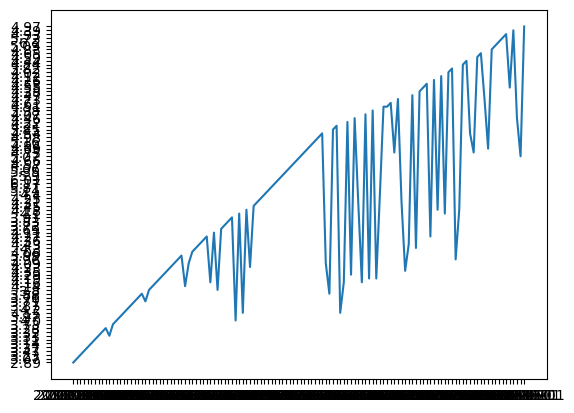

In [53]:
Aussie_beef
x=Aussie_beef['time']
y=Aussie_beef['price']
plt.plot(x,y)
plt.show()

In [49]:
Aussie_beef = Aussie_beef.sort_values(by='time')
Aussie_beef

,time,country,commodity,price
125,2010-01-01,Australia,Beef,2.89
124,2010-02-01,Australia,Beef,3.07
123,2010-03-01,Australia,Beef,3.23
122,2010-04-01,Australia,Beef,3.47
121,2010-05-01,Australia,Beef,3.37
...,...,...,...,...
4,2020-02-01,Australia,Beef,4.55
3,2020-03-01,Australia,Beef,4.39
2,2020-04-01,Australia,Beef,4.46
1,2020-05-01,Australia,Beef,5.07


In [43]:
dom_clean_data_copy.head()

,month,country,price_type,market,commodity,price
1,2020-05-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
2,2020-04-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.59
3,2020-03-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.61
4,2020-02-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.63
5,2020-01-01,Cote d'Ivoire,Retail,Abidjan,Attieke,0.68


In [40]:
#let's export our work
CampaignClean.to_csv("cleaned_resources/percent_change_post_covid.csv",index=False)
int_clean_data_cleaned.to_csv("cleaned_resources/int_clean_data_cleaned.csv",index=False)
dom_clean_data_copy.to_csv("cleaned_resources/new_dom_clean_data.csv",index=False)
